In [1]:
%matplotlib inline
from meme_wrapper import Meme

In [2]:
#Meme().display_meme_help()

In [3]:
X = Meme(alphabet="dna", mod="anr", output_dir="meme_anr", nmotifs=3)
X.fit(fasta_file="seq18.fa")

In [4]:
predictions = X.predict(fasta_file="seq9.fa", return_list=True)
for p in predictions: print p

[0, 1, 2]
[0, 1]
[0]
[0]
[0]
[0]
[0, 0, 1]
[0]
[0, 2]


In [5]:
predictions = X.predict(fasta_file="seq9.fa", return_list=False)
for p in predictions: print p

3
2
1
1
1
1
3
1
2


In [6]:
match = X.transform(fasta_file="seq9.fa", return_match=True)
for m in match: print m

[[(64, 83)], [(30, 44)], [(91, 105)]]
[[(58, 77)], [(36, 50)], []]
[[(79, 98)], [], []]
[[(66, 85)], [], []]
[[(53, 72)], [], []]
[[(10, 29)], [], []]
[[(27, 46), (54, 73)], [(3, 17)], []]
[[(42, 61)], [], []]
[[(12, 31)], [], [(37, 51)]]


In [7]:
match = X.transform(fasta_file="seq9.fa", return_match=False)
for m in match: print m

[1, 1, 1]
[1, 1, 0]
[1, 0, 0]
[1, 0, 0]
[1, 0, 0]
[1, 0, 0]
[1, 1, 0]
[1, 0, 0]
[1, 0, 1]


In [8]:
# Position Weight Matrix of each motif
pwms = X.pwms
for i in pwms: print i

        0      1      2      3      4      5      6      7      8      9     10     11     12     13     14     15     16     17     18
A:   0.00   0.00   0.00   0.17   0.94   0.33   0.28   0.11   0.50   0.06   0.17   0.00   0.06   0.78   0.06   0.78   0.22   0.44   0.33
C:   0.17   0.06   0.06   0.06   0.06   0.22   0.33   0.22   0.00   0.22   0.28   0.11   0.89   0.00   0.89   0.06   0.28   0.06   0.06
G:   0.00   0.78   0.00   0.72   0.00   0.17   0.22   0.39   0.22   0.50   0.17   0.17   0.00   0.17   0.00   0.06   0.06   0.00   0.00
T:   0.83   0.17   0.94   0.06   0.00   0.28   0.17   0.28   0.28   0.22   0.39   0.72   0.06   0.06   0.06   0.11   0.44   0.50   0.61

        0      1      2      3      4      5      6      7      8      9     10     11     12     13
A:   0.00   0.17   0.50   0.00   1.00   0.67   1.00   1.00   0.17   0.67   0.17   0.00   0.33   0.00
C:   0.00   0.33   0.33   0.00   0.00   0.00   0.00   0.00   0.17   0.00   0.67   0.50   0.00   1.00
G:   1.00   0.50

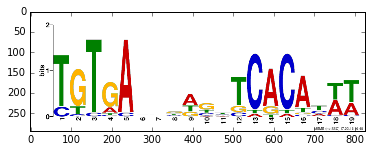

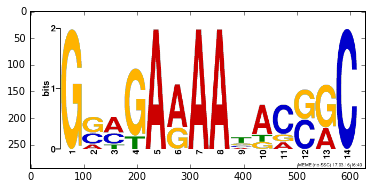

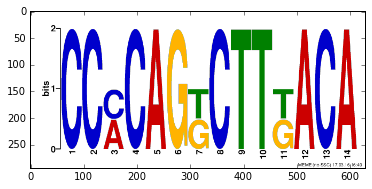

In [9]:
# Display sequence logos generated by the meme tool
X.logos() # image_num=None displays all logos

#TODO: Object Weblogo to generate logos locally

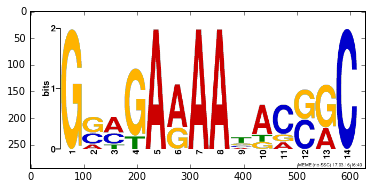

In [10]:
X.logos(image_num=1)    #loads the specified image from output folder

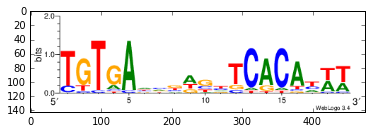

In [11]:
#logo generation with Biopython; uses internet connection to generate the logo
#logo for 1st motif shown here for Comparison
import PIL 
import matplotlib.pyplot as plt
from Bio import motifs

fname='biopython_logo.png'
motif = X.motives_db[0]
motif.weblogo(fname=fname, 
              stack_width='large', 
              show_errorbars=False,
              color_scheme='color_classic')
img = PIL.Image.open(fname)
plt.imshow(img)

In [12]:
Y = Meme(alphabet="dna", mod="anr", nmotifs=3)

In [13]:
predictions = Y.fit_predict(fasta_file="seq18.fa", return_list=True)
for p in predictions: print p

[0, 1, 2]
[0, 1]
[0]
[0]
[0]
[0]
[0, 0, 1]
[0]
[0, 2]
[0]
[0, 1]
[0]
[0]
[0]
[0]
[0, 1]
[1]
[0]


In [14]:
matches = Y.fit_transform(fasta_file="seq18.fa", return_match=True)
for m in matches: print m

[[(64, 83)], [(30, 44)], [(91, 105)]]
[[(58, 77)], [(36, 50)], []]
[[(79, 98)], [], []]
[[(66, 85)], [], []]
[[(53, 72)], [], []]
[[(10, 29)], [], []]
[[(27, 46), (54, 73)], [(3, 17)], []]
[[(42, 61)], [], []]
[[(12, 31)], [], [(37, 51)]]
[[(17, 36)], [], []]
[[(64, 83)], [(15, 29)], []]
[[(44, 63)], [], []]
[[(51, 70)], [], []]
[[(74, 93)], [], []]
[[(20, 39)], [], []]
[[(56, 75)], [(81, 95)], []]
[[], [(79, 93)], []]
[[(81, 100)], [], []]


In [15]:
#Displaying e-values for each motif
print X.e_values

[1.4e-05, 310.0, 1300.0]


In [17]:
#Displaying p-value scores for each sequence given as input to predict corresponding every motif
for i in X.seq_scores: print i

[[2.35e-06], [2.7e-07], [1.12e-08]]
[[4.67e-06], [2.01e-06], [0.0]]
[[6.76e-06], [0.0], [0.0]]
[[8.09e-06], [0.0], [0.0]]
[[3.02e-05], [0.0], [0.0]]
[[1.55e-06], [0.0], [0.0]]
[[1.74e-05, 3.51e-05], [1.88e-06], [0.0]]
[[3.51e-05], [0.0], [0.0]]
[[6.33e-07], [0.0], [3.51e-09]]
